
## Assignment 4 - Ryan Timbrook
1.) Compare and test Normality of the distributions of price and log price - use both a graphical method and a formal test
2.) Test significance of price (log price) stratified by: a) fuel type, b) aspiration, c) rear vs. front wheel drive - use both graphical methods and the fromal test.
3.) Apply ANOVA to the auto price data to compare the price (or log price if closer to a Normal distribution) of autos stratified by number of doors, and body style - two sets of tests
-Graphically explore the differences between the price conditioned by the categories of each variable
-Use standard ANOVA and Tukey ANOVA to test the differences of these groups.

In [1]:
#Clear session memory and consol
rm(list=ls())
cat('\014')
#load required packages
require(dplyr)

Loading required package: dplyr

Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



In [2]:
# Read Automobile price data
read.auto = function(file = 'Automobile price data _Raw_.csv'){
  ## Read the csv file
  auto.price <- read.csv(file, header = TRUE, stringsAsFactors = FALSE)
  
  ## Coerce some character columns to numeric
  numcols <- c('price', 'bore', 'stroke', 'horsepower', 'peak.rpm')
  auto.price[, numcols] <- lapply(auto.price[, numcols], as.numeric)
  
  ## Remove cases or rows with missing values. 
  auto.price[complete.cases(auto.price), ]
}

In [3]:
# Read Auto data file
auto.price = read.auto()
# Add log normal of price as new attribute
auto.price$lnprice = log(auto.price$price)

Warning message in lapply(auto.price[, numcols], as.numeric):
"NAs introduced by coercion"Warning message in lapply(auto.price[, numcols], as.numeric):
"NAs introduced by coercion"Warning message in lapply(auto.price[, numcols], as.numeric):
"NAs introduced by coercion"Warning message in lapply(auto.price[, numcols], as.numeric):
"NAs introduced by coercion"Warning message in lapply(auto.price[, numcols], as.numeric):
"NAs introduced by coercion"

1.) Compare and test Normality of the distributions of price and log price
Steps: 
-generate two samples sets of prices from the auto price data set
-Use Q-Q to plot normality of distrobution of auto price sample sets


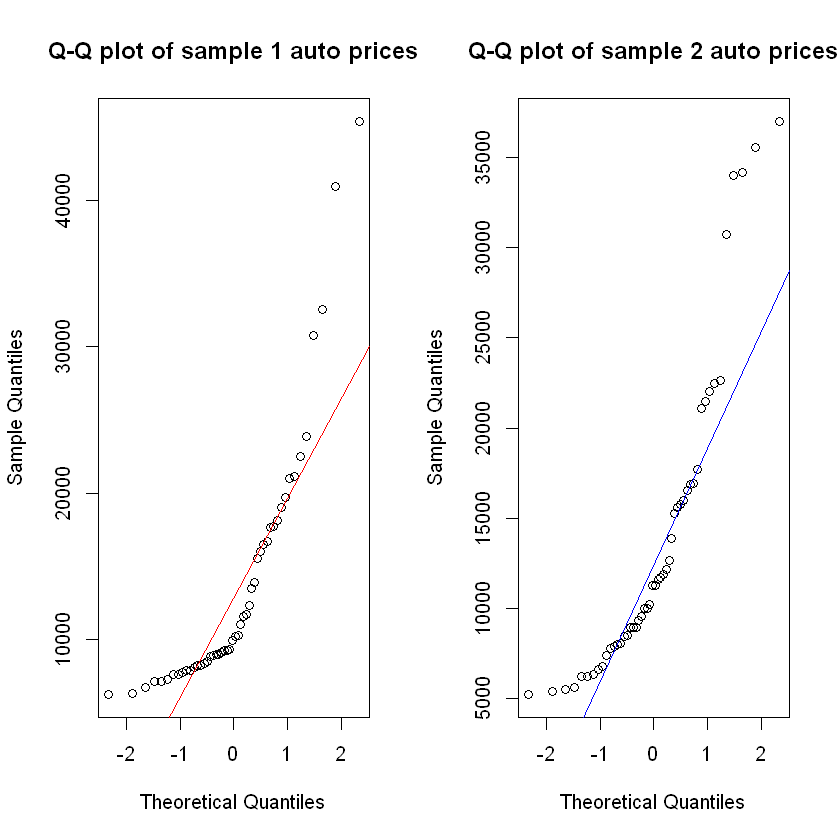

In [4]:
# Test normality of two equal samples of prices
price.s1 = sample(auto.price$price,50,replace=FALSE)
price.s2 = sample(auto.price$price,50,replace=FALSE)
# Q-Q Plot Normality of distribution of auto price sample sets
par(mfrow = c(1,2))
qqnorm(price.s1, main='Q-Q plot of sample 1 auto prices')
qqline(price.s1,col='red')
qqnorm(price.s2, main='Q-Q plot of sample 2 auto prices')
qqline(price.s2,col='blue')
par(mfrow = c(1,1))

#What is the result?

What does this show us?

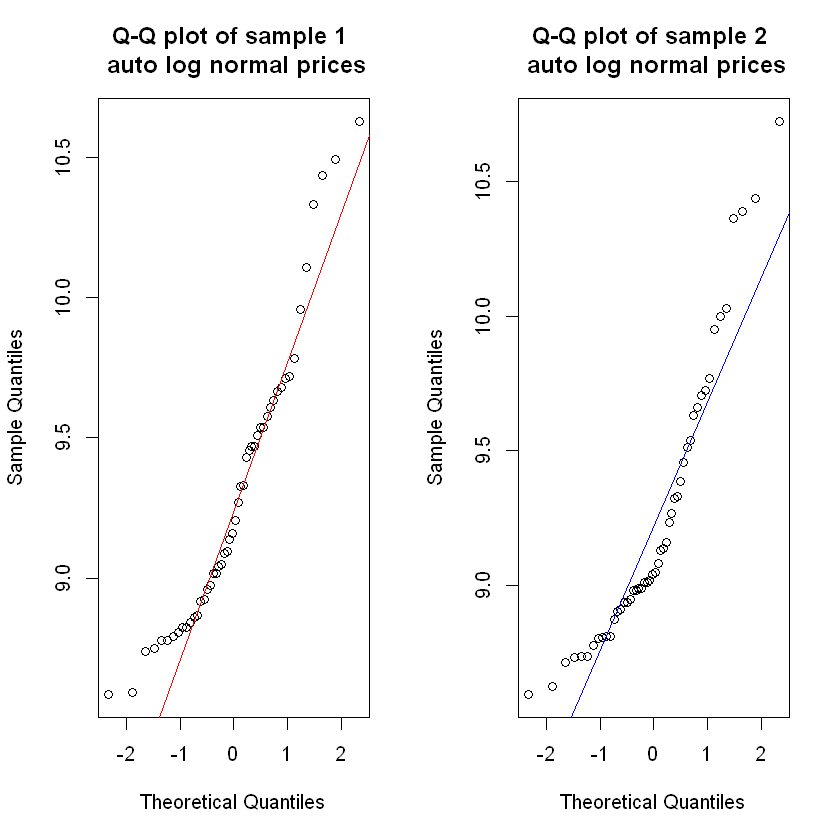

In [5]:
## Test normality of two equal samples of prices
lnprice.s1 = sample(auto.price$lnprice,50,replace=FALSE)
lnprice.s2 = sample(auto.price$lnprice,50,replace=FALSE)

# Q-Q Plot Normality of distribution of log normal auto price sample sets
par(mfrow = c(1,2))
qqnorm(lnprice.s1, main='Q-Q plot of sample 1 \n auto log normal prices')
qqline(lnprice.s1,col='red')
qqnorm(lnprice.s2, main='Q-Q plot of sample 2 \n auto log normal prices')
qqline(lnprice.s2,col='blue')
par(mfrow = c(1,1))

#What is the result?

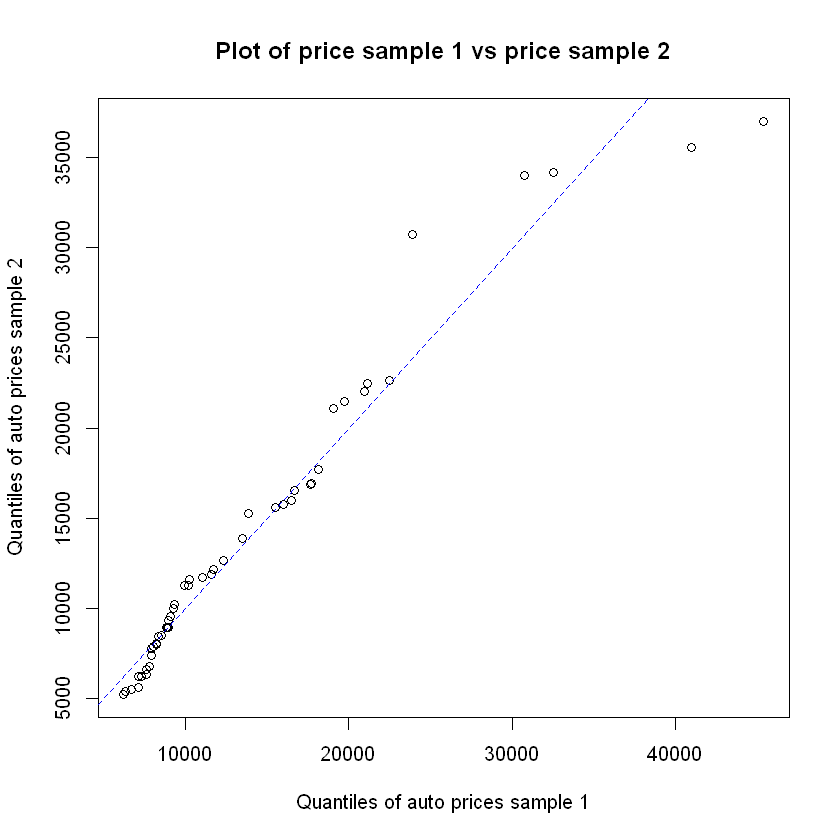

In [6]:
# plot log normal price sample one distrobution against log normal price sample distribution 2
plot(sort(price.s1), sort(price.s2), main = "Plot of price sample 1 vs price sample 2",
     xlab='Quantiles of auto prices sample 1', ylab='Quantiles of auto prices sample 2')
abline(a=0.0,b=1.0,lty=2,col='blue')

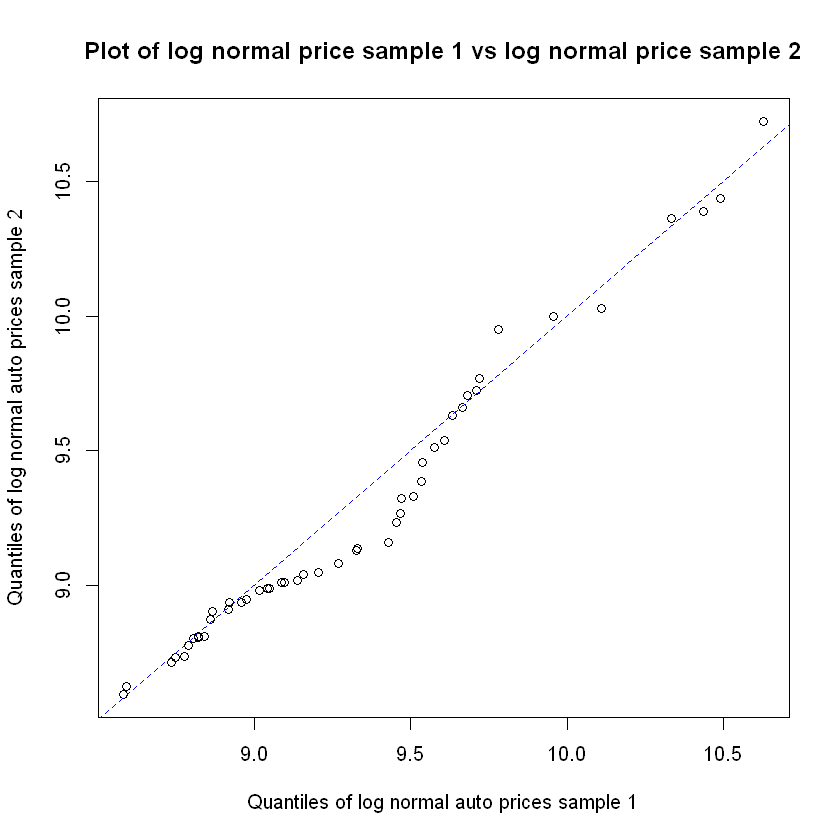

In [7]:
# plot log normal price sample one distrobution against log normal price sample distribution 2
plot(sort(lnprice.s1), sort(lnprice.s2), main = "Plot of log normal price sample 1 vs log normal price sample 2",
     xlab='Quantiles of log normal auto prices sample 1', ylab='Quantiles of log normal auto prices sample 2')
abline(a=0.0,b=1.0,lty=2,col='blue')

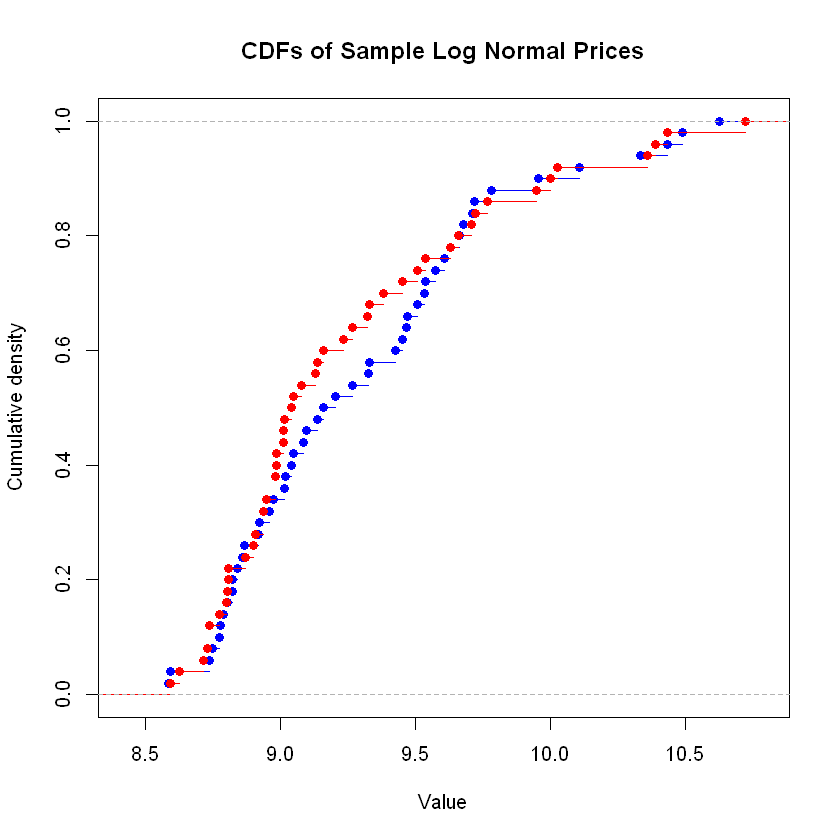

In [8]:
# Plot Kolmogorov-Smirnov test. K-S statistic is the maximum vertical distance between two CDFs.
plot(ecdf(lnprice.s1), col='blue', main='CDFs of Sample Log Normal Prices', 
     xlab='Value', ylab='Cumulative density')
lines(ecdf(lnprice.s2), col='red')


2.) Test significance

In [9]:
plot.t <- function(a, b, cols = c('pop_A', 'pop_B'), nbins = 20){
  maxs = max(c(max(a), max(b)))
  mins = min(c(min(a), min(b)))
  breaks = seq(maxs, mins, length.out = (nbins + 1))
  par(mfrow = c(2, 1))
  hist(a, breaks = breaks, main = paste('Histogram of', cols[1]), xlab = cols[1])
  abline(v = mean(a), lwd = 4, col = 'red')
  hist(b, breaks = breaks, main = paste('Histogram of', cols[2]), xlab = cols[2])
  abline(v = mean(b), lwd = 4, col = 'red')
  par(mfrow = c(1, 1))
}

In [10]:
#Create a subset of the data frame attributes to compare
auto.price.sig.sub = auto.price[,c('price','lnprice','fuel.type','aspiration','drive.wheels')]
auto.price.sig.sub = auto.price.sig.sub %>% filter(drive.wheels == 'rwd' | drive.wheels == 'fwd')

# Auto Prices by Fuel Types
autoPricesByFuelType = auto.price.sig.sub[,c('price','lnprice','fuel.type')]
## Is the Average price of diesel cars different from gas cars?
diesel.lnprices = autoPricesByFuelType[autoPricesByFuelType$fuel.type == 'diesel',]$lnprice
gas.lnprices = autoPricesByFuelType[autoPricesByFuelType$fuel.type == 'gas',]$lnprice


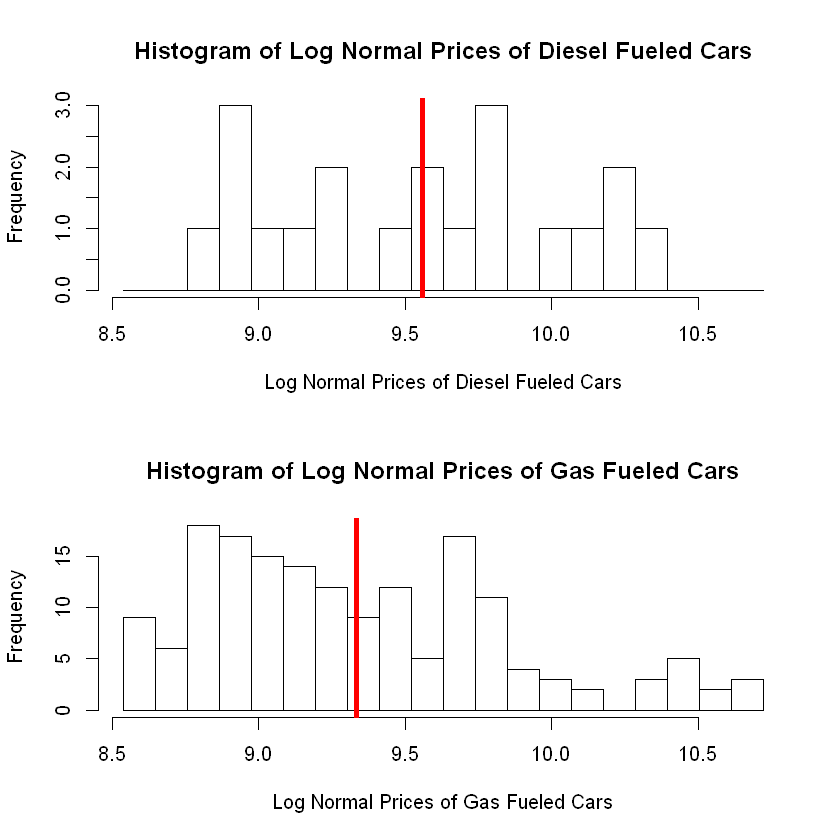

In [11]:
plot.t(diesel.lnprices,gas.lnprices, cols=c('Log Normal Prices of Diesel Fueled Cars','Log Normal Prices of Gas Fueled Cars'))

In [12]:
t.test(diesel.lnprices,gas.lnprices, alternative = "two.sided")


	Welch Two Sample t-test

data:  diesel.lnprices and gas.lnprices
t = 1.9397, df = 24.363, p-value = 0.06408
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.01424314  0.46494692
sample estimates:
mean of x mean of y 
 9.557420  9.332068 


In [13]:
# Auto Prices by Aspiration
autoPricesByAspiration = auto.price.sig.sub[,c('price','lnprice','aspiration')]
autoPricesByAspiration.group = autoPricesByAspiration %>% group_by(aspiration) %>% 
  summarise(count=n(),mean.price = mean(price,na.rm=TRUE),mean.lnprice = mean(lnprice,na.rm=TRUE), sd.price = sd(price,na.rm=TRUE), sd.lnprice = sd(lnprice,na.rm=TRUE), 
            max.price = max(price), max.lnprice = max(lnprice), min.price=min(price), min.lnprice=min(lnprice))

## Is the Average price of standard cars different from turbo cars?
std.lnprices = autoPricesByAspiration[autoPricesByAspiration$aspiration == 'std',]$lnprice
turbo.lnprices = autoPricesByAspiration[autoPricesByAspiration$aspiration == 'turbo',]$lnprice

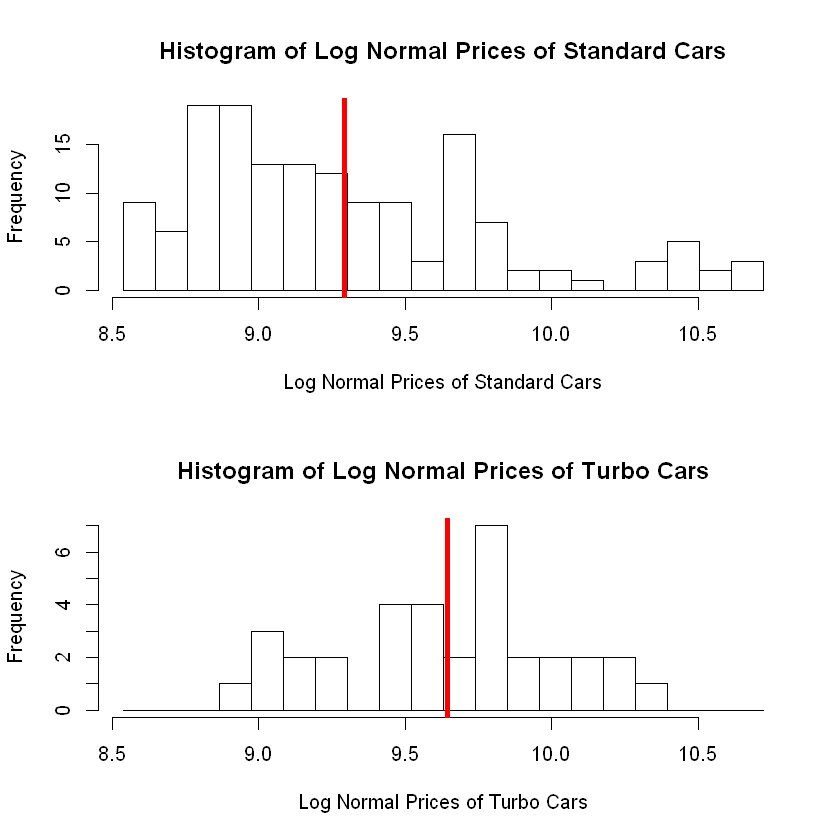

In [14]:
plot.t(std.lnprices,turbo.lnprices, cols=c('Log Normal Prices of Standard Cars','Log Normal Prices of Turbo Cars'))

In [15]:
t.test(std.lnprices,turbo.lnprices, alternative = "two.sided")


	Welch Two Sample t-test

data:  std.lnprices and turbo.lnprices
t = -4.44, df = 62.417, p-value = 3.742e-05
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.5071209 -0.1922786
sample estimates:
mean of x mean of y 
 9.292588  9.642288 


In [16]:
# Auto Prices by Front Wheel Drive
autoPricesByWheelDrive = auto.price.sig.sub[,c('price','lnprice','drive.wheels')]
autoPricesByFrontWheelDrive.group = autoPricesByWheelDrive %>% filter(drive.wheels == 'fwd') %>% group_by(drive.wheels) %>% 
  summarise(count=n(),mean.price = mean(price,na.rm=TRUE),mean.lnprice = mean(lnprice,na.rm=TRUE), sd.price = sd(price,na.rm=TRUE), sd.lnprice = sd(lnprice,na.rm=TRUE), 
            max.price = max(price), max.lnprice = max(lnprice), min.price=min(price), min.lnprice=min(lnprice))

# Auto Prices by Rear Wheel Drive
autoPricesByRearWheelDrive.group = autoPricesByWheelDrive %>% filter(drive.wheels == 'rwd') %>% group_by(drive.wheels) %>% 
  summarise(count=n(),mean.price = mean(price,na.rm=TRUE),sd.price=sd(price,na.rm=TRUE),max.price=max(price),min.price=min(price))

## Is the Average price of a front wheel drive car different then a rear wheel drive car
fwd.lnprices = autoPricesByWheelDrive[autoPricesByWheelDrive$drive.wheels == 'fwd',]$lnprice
rwd.lnprices = autoPricesByWheelDrive[autoPricesByWheelDrive$drive.wheels == 'rwd',]$lnprice

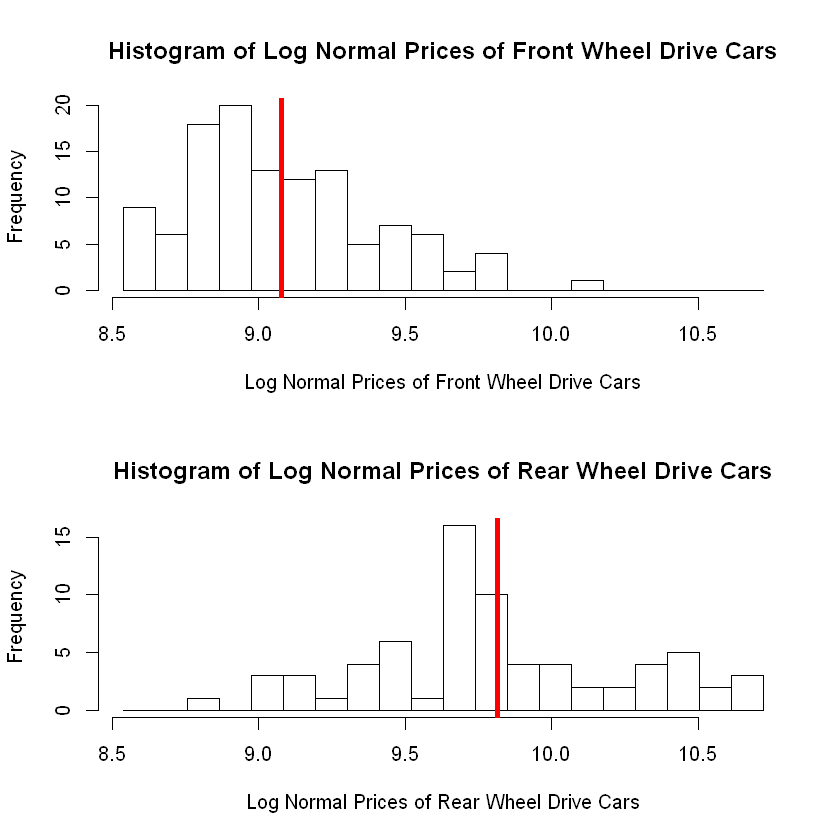

In [17]:
plot.t(fwd.lnprices,rwd.lnprices, cols=c('Log Normal Prices of Front Wheel Drive Cars','Log Normal Prices of Rear Wheel Drive Cars'))

In [18]:
t.test(fwd.lnprices,rwd.lnprices, alternative = "two.sided")


	Welch Two Sample t-test

data:  fwd.lnprices and rwd.lnprices
t = -12.233, df = 115.43, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.8571999 -0.6182849
sample estimates:
mean of x mean of y 
 9.076065  9.813807 


3.) Apply ANOVA to the auto price data to compare the price grouped by number of doors and body style

In [19]:
auto.price.avo.sub = auto.price[,c('price','lnprice','num.of.doors','body.style')]
autoPricesByNumOfDoors = auto.price.avo.sub %>% select(-body.style) %>% filter(num.of.doors != '?')

autoPricesByNumOfDoors.group = autoPricesByNumOfDoors %>% group_by(num.of.doors) %>% 
  summarise(count=n(),mean.price = mean(price,na.rm=TRUE),mean.lnprice = mean(lnprice,na.rm=TRUE), sd.price = sd(price,na.rm=TRUE), sd.lnprice = sd(lnprice,na.rm=TRUE), 
            max.price = max(price), max.lnprice = max(lnprice), min.price=min(price), min.lnprice=min(lnprice))

autoPricesByBodyStyle = auto.price.avo.sub %>% select(-num.of.doors)
autoPricesByBodyStyle.group = autoPricesByBodyStyle %>% group_by(body.style) %>% 
  summarise(count=n(),mean.price = mean(price,na.rm=TRUE),mean.lnprice = mean(lnprice,na.rm=TRUE), sd.price = sd(price,na.rm=TRUE), sd.lnprice = sd(lnprice,na.rm=TRUE), 
            max.price = max(price), max.lnprice = max(lnprice), min.price=min(price), min.lnprice=min(lnprice))



Boxplot the number of doors prices and body style

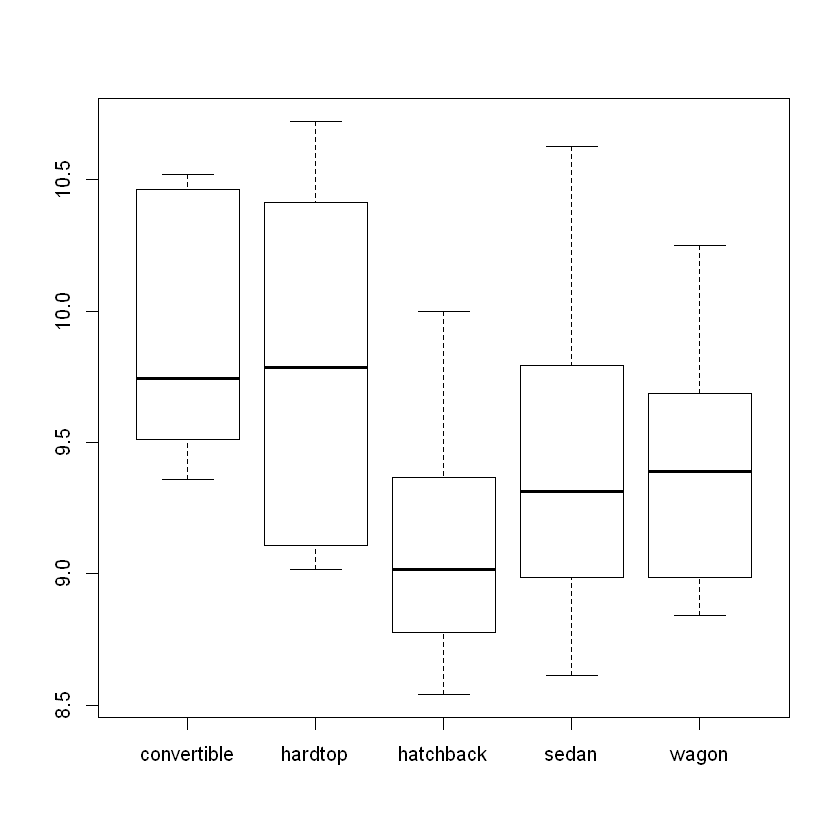

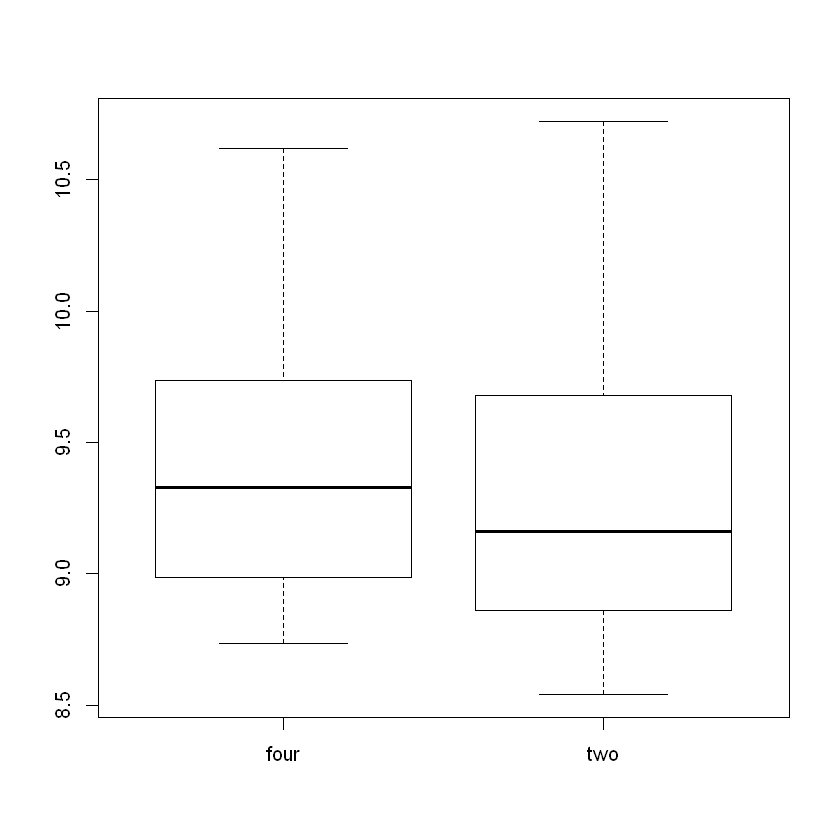

In [20]:
#Boxplot of the Body Style grouping of auto log normal prices
boxplot(autoPricesByBodyStyle$lnprice ~ autoPricesByBodyStyle$body.style)
#Boxplot of the Number of doors grouping of auto log normal prices
boxplot(autoPricesByNumOfDoors$lnprice ~ autoPricesByNumOfDoors$num.of.doors)

In [21]:
# ANOVA of Number of Doors to Log normal auto price
numOfDoors_aov = aov(autoPricesByNumOfDoors$lnprice ~ autoPricesByNumOfDoors$num.of.doors)
summary(numOfDoors_aov)
print(numOfDoors_aov)

                                     Df Sum Sq Mean Sq F value Pr(>F)
autoPricesByNumOfDoors$num.of.doors   1   0.60  0.6047   2.331  0.129
Residuals                           191  49.56  0.2595               

Call:
   aov(formula = autoPricesByNumOfDoors$lnprice ~ autoPricesByNumOfDoors$num.of.doors)

Terms:
                autoPricesByNumOfDoors$num.of.doors Residuals
Sum of Squares                              0.60473  49.55967
Deg. of Freedom                                   1       191

Residual standard error: 0.5093866
Estimated effects may be unbalanced


In [22]:
# ANOVA of Body Style to Log Normal auto price
bodyStyle_aov = aov(autoPricesByBodyStyle$lnprice ~ autoPricesByBodyStyle$body.style)
summary(bodyStyle_aov)
print(bodyStyle_aov)

                                  Df Sum Sq Mean Sq F value   Pr(>F)    
autoPricesByBodyStyle$body.style   4   7.85  1.9615   8.788 1.57e-06 ***
Residuals                        190  42.41  0.2232                     
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Call:
   aov(formula = autoPricesByBodyStyle$lnprice ~ autoPricesByBodyStyle$body.style)

Terms:
                autoPricesByBodyStyle$body.style Residuals
Sum of Squares                           7.84591  42.41013
Deg. of Freedom                                4       190

Residual standard error: 0.4724523
Estimated effects may be unbalanced


Tukey's ANOVA:
Note: Only differences in means with a confidence interval not overlapping zero are considered significant

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = autoPricesByNumOfDoors$lnprice ~ autoPricesByNumOfDoors$num.of.doors)

$`autoPricesByNumOfDoors$num.of.doors`
              diff        lwr        upr    p adj
two-four -0.113425 -0.2599742 0.03312415 0.128507


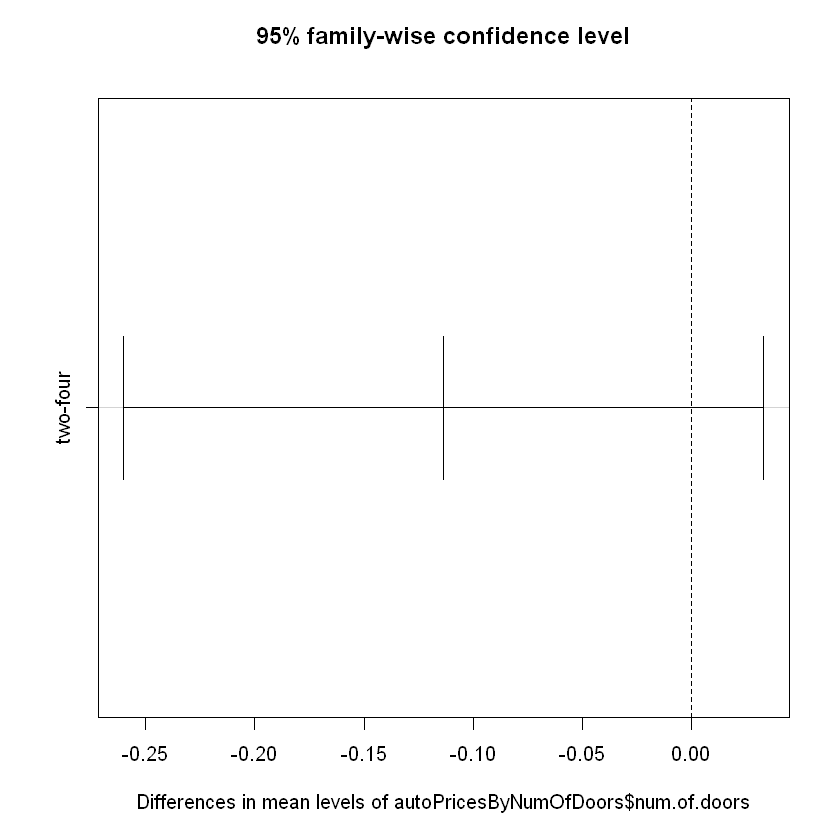

In [23]:
# Tukey ANOVA of Number of Doors to Prices
numOfDoors_tuk = TukeyHSD(numOfDoors_aov)
# Print model data
numOfDoors_tuk
# Plot
plot(numOfDoors_tuk)

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = autoPricesByBodyStyle$lnprice ~ autoPricesByBodyStyle$body.style)

$`autoPricesByBodyStyle$body.style`
                             diff         lwr         upr     p adj
hardtop-convertible   -0.09664988 -0.79938112  0.60608136 0.9955964
hatchback-convertible -0.78537118 -1.34130681 -0.22943556 0.0012903
sedan-convertible     -0.45193455 -0.99984087  0.09597177 0.1586910
wagon-convertible     -0.53101926 -1.12493556  0.06289704 0.1037126
hatchback-hardtop     -0.68872130 -1.17710344 -0.20033917 0.0013238
sedan-hardtop         -0.35528467 -0.83450698  0.12393764 0.2502185
wagon-hardtop         -0.43436938 -0.96558426  0.09684551 0.1654127
sedan-hatchback        0.33343663  0.12157052  0.54530274 0.0002276
wagon-hatchback        0.25435193 -0.05777382  0.56647767 0.1680903
wagon-sedan           -0.07908470 -0.37667401  0.21850460 0.9488191


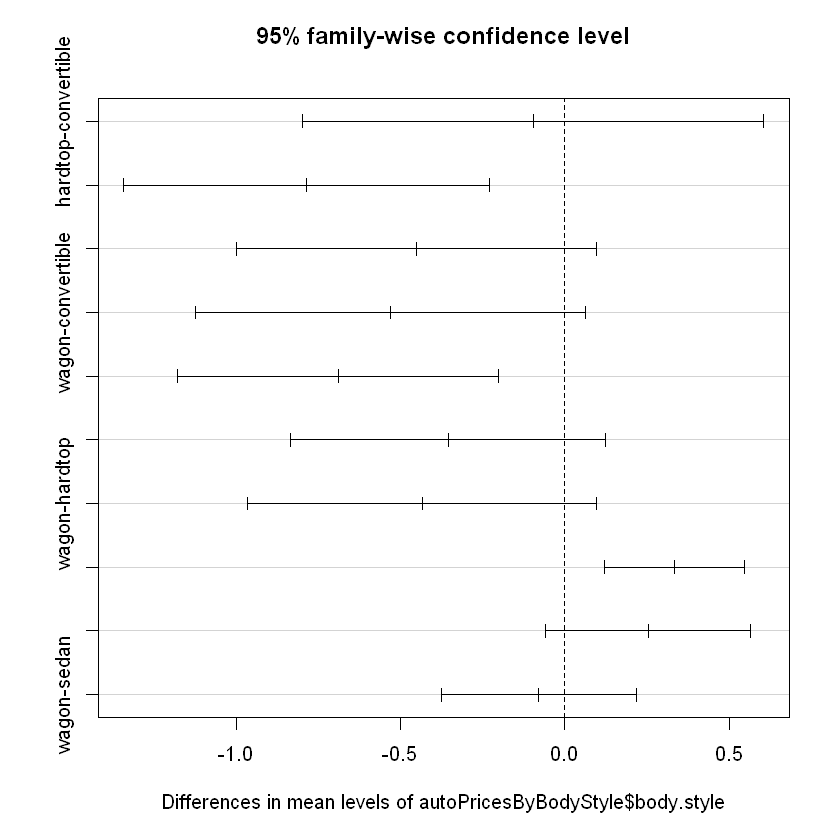

In [24]:
# Tukey ANOVA of Body Style Prices
bodyStyles_tuk = TukeyHSD(bodyStyle_aov)
# Print model data
bodyStyles_tuk
# Plot
plot(bodyStyles_tuk)